<a href="https://colab.research.google.com/github/AleMoura77/lia1_2025_1/blob/main/LIA_Aula09_AlexandreMouraCaldeira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Construindo um Modelo com Tensorflow -  🐶 🐱!**

**Problema: uma imagem, dizer se é um dog ou um cat.**

Computer Vision; Deep Learning; Machine Learning; Artificial Inteligence! Nada disso faz sentido sem dados, muitos dados (Big Data! 🚀). Para isso, teremos:

* **Treinamento**: 25.000 imagens nomeadas: 12.500 de dogs e 12.500 de cats.
* **Teste**: 1.000 imagens de dogs e cats.

Usa-se os dados de treino para treinar o algoritmo e então criar o modelo preditivo. Usa-se os dados de teste para confirmar o desempenho do modelo preditivo já treinado, ou seja, apresenta-se ao modelo preditivo dados que ele não viu durante o treinamento, a fim de garantir que ele seja capaz de fazer previsões.

Por fim, o modelo de duas camadas de convolução seguidas de pooling, a camada de flattening, e as camadas totalmente conectadas (Dense), com a função de ativação sigmoid para a saída binária.

**Não há mágica. Há matemática!** 🧙

Fonte de dados

O Kaggle oferece diversos datasets públicos que podem ser usados para você desenvolver seus projetos e incluir no seu portfólio, uma excelente forma de demonstrar suas habilidades em Data Science e Machine Learning. Usaremos como fonte de dados, o famoso [dataset Dogs and Cats.](https://www.kaggle.com/c/dogs-vs-cats/data)

---

# Conectando Kaggle com o Colab

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alemoura","key":"386cdf691fe33d683fcb74054ddc366b"}'}

In [2]:
pip install kaggle -q

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Baixando dataset

In [4]:
%cd /content/
!kaggle competitions download -c dogs-vs-cats

/content


In [5]:
!unzip -q dogs-vs-cats.zip -d dogs-vs-cats

In [6]:
%cd /content/dogs-vs-cats/
!unzip -q train.zip -d train


/content/dogs-vs-cats


In [7]:
%cd /content/dogs-vs-cats/
!unzip -q test1.zip

/content/dogs-vs-cats


# Organizando as imagens

In [13]:
import os
import shutil

# Criar diretórios se não existirem
os.makedirs('/content/dogsvscats/train/cats', exist_ok=True)
os.makedirs('/content/dogsvscats/train/dogs', exist_ok=True)

# Caminho para a pasta onde todas as imagens estão juntas
source_folder = "/content/dogs-vs-cats/train/train"

# Mover cada imagem para a pasta correspondente
for filename in os.listdir(source_folder):
    if "cat" in filename.lower():
        shutil.move(os.path.join(source_folder, filename), "/content/dogsvscats/train/cats/")
    elif "dog" in filename.lower():
        shutil.move(os.path.join(source_folder, filename), "/content/dogsvscats/train/dogs/")

In [12]:
%cd /content/
!rm -rf dogsvscats

/content


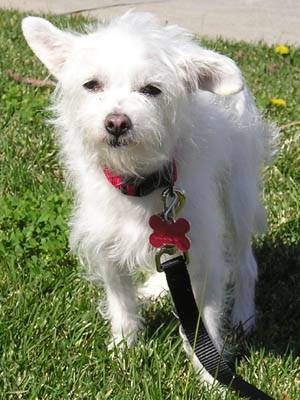

In [14]:
#Carregando os dados de Treino e Teste

# Do dataset de treino, carregue uma imagem de cachorro
from IPython.display import Image
Image(filename='/content/dogsvscats/train/dogs/dog.12499.jpg')

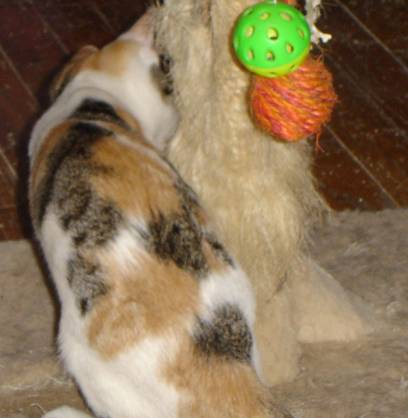

In [15]:
#Carregando os dados de Treino e Teste**

# Do dataset de treino, carregue uma imagem de gato
Image(filename='/content/dogsvscats/train/cats/cat.12499.jpg')

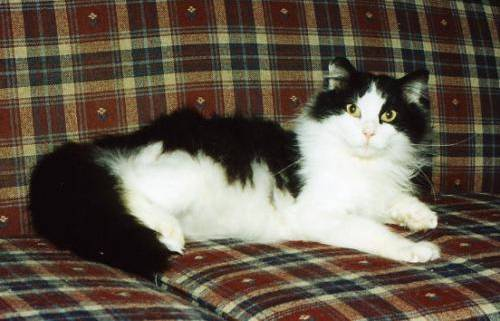

In [17]:
# Do dataset de teste, carregue uma imagem de gato ou de cachorro
from IPython.display import Image
Image(filename='/content/dogs-vs-cats/test1/54.jpg')

**Construindo a Rede Neural Convolucional**

O Keras é uma biblioteca do TensorFlow.



In [18]:
import tensorflow as tf
import keras as K

# Importar K e suas funções necessárias

from keras.models import Sequential
from keras.layers import Conv2D, Dropout,MaxPooling2D, Flatten, Dense

In [30]:
# Inicializando a Rede Neural Convolucional
classifier = Sequential()

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Inicializando a rede neural
classifier = Sequential()

# Primeira camada de convolução + pooling
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Segunda camada de convolução + pooling
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Terceira camada de convolução + pooling
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
classifier.add(Flatten())

# Full connection
classifier.add(Dense(units=128, activation='relu'))

# Normalização para evitar overfitting
classifier.add(Dropout(0.5))

# Camada de saída
classifier.add(Dense(units=1, activation='sigmoid'))

# Compilando a rede
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Configuração do tamanho do lote para 64 ao treinar
batch_size = 64


**Pré-processamento**

Fazer pré-processamento nos dados, em nosso caso as imagens.

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Criar o objeto com as regras de pré-processamento
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2 )

In [38]:
# Pré-processamento das imagens de treino
training_set = train_datagen.flow_from_directory('/content/dogsvscats/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                 subset='training')

Found 20000 images belonging to 2 classes.


**TREINAMENTO DO MODELO**

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

In [ ]:
history = classifier.fit(
    training_set,
    steps_per_epoch=625,
    callbacks=[early_stopping],
    epochs=25,
)


Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 124s 195ms/step - accuracy: 0.5834 - loss: 0.6675
Epoch 2/25


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 139s 191ms/step - accuracy: 0.7160 - loss: 0.5602
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 190ms/step - accuracy: 0.7625 - loss: 0.4955
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 147s 198ms/step - accuracy: 0.7839 - loss: 0.4597
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 139s 193ms/step - accuracy: 0.7967 - loss: 0.4346
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 140s 190ms/step - accuracy: 0.8047 - loss: 0.4167
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 140s 187ms/step - accuracy: 0.8211 - loss: 0.3964
Epoch 8/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 122s 195ms/step - accuracy: 0.8268 - loss: 0.3795
Epoch 9/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 138s 189ms/step - accuracy: 0.8402 - loss: 0.3691
Epoch 10/25
316/625 ━━━━━━━━━━━━━━━━━━━━ 57s 187ms/step - accuracy: 0.8395 - loss: 0.3586

NAO DEU TEMPO DE TREINAR O MODELO, MAS ELE ESTAVA EVOLUINDO BEM

In [ ]:
import matplotlib.pyplot as plt

# Pegando o histórico do treinamento
history_dict = classifier.history.history

# Verificando se a métrica é 'accuracy' ou 'acc'
acc_key = 'accuracy' if 'accuracy' in history_dict else 'acc'
val_acc_key = 'val_' + acc_key

# Gráfico de Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_dict[acc_key], label='Treino')
plt.plot(history_dict[val_acc_key], label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.title('Evolução da Accuracy')

# Gráfico de Loss
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='Treino')
plt.plot(history_dict['val_loss'], label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.title('Evolução da Loss')

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Previsão: Gato.
Acurácia: 92.35 %.


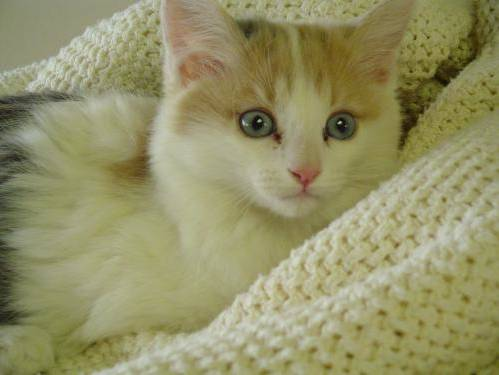

In [ ]:
import numpy as np
from keras.preprocessing import image
from IPython.display import Image

# Carregando a imagem de teste
test_image = image.load_img('/content/dogsvscats/test1/1234.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0  # Normalizar a imagem

# Fazendo a previsão usando o modelo classifier
result = classifier.predict(test_image)
class_indices = training_set.class_indices

if result[0][0] >= 0.5:
    prediction = 'Cachorro.'
    accuracy = round(result[0][0] * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1
else:
    prediction = 'Gato.'
    accuracy = round((1 - result[0][0]) * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1

# Exibindo a previsão e a acurácia
print("Previsão:", prediction)
print("Acurácia:", accuracy, "%.")

# Exibindo a imagem
Image(filename='/content/dogsvscats/test1/1234.jpg')
